In [1]:
p_correct = 0.52
p_bug = 0.001
trade_value = 5000
trades_per_year = 10000

def calc_expected_value_with_bug(p_correct, p_bug, trade_value, trades_per_year):
    # Expected value of a single trade with bug
    expected_value_with_bug = trade_value * (p_correct * (1 - p_bug) + (1 - p_correct) * p_bug) - trade_value * ((1-p_correct) * (1 - p_bug) + p_correct * p_bug)
    
    # total expected value
    total_with_bug = trades_per_year * expected_value_with_bug
    return total_with_bug

def calc_expected_value_no_bug(p_correct, trade_value, trades_per_year):
    # Expected value of a single trade without bug
    expected_value_no_bug = trade_value * p_correct - trade_value * (1 - p_correct)
    
    # total expected value
    total_no_bug = trades_per_year * expected_value_no_bug
    return total_no_bug

# Expected value of n trades
total_with_bug = calc_expected_value_with_bug(p_correct, p_bug, trade_value, trades_per_year)
total_no_bug = calc_expected_value_no_bug(p_correct, trade_value, trades_per_year)

# Sumamrize
print(f"Expected value of {trades_per_year} trades with bug: ${total_with_bug:.2f}")
print(f"Expected value of {trades_per_year} trades without bug: ${total_no_bug:.2f}")
print(f"Difference: ${total_no_bug - total_with_bug:.2f}")

# If fixing the bug costs less than 4k then we should, otherwise we shouldn't.

Expected value of 10000 trades with bug: $1996000.00
Expected value of 10000 trades without bug: $2000000.00
Difference: $4000.00


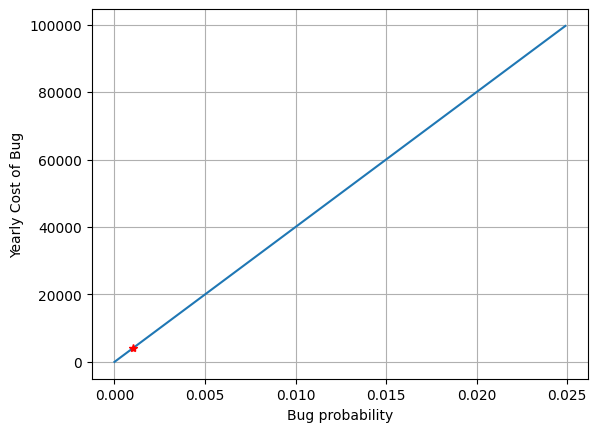

In [3]:
# Evaluate the cost of the bug versus the bug probability
import numpy as np
import matplotlib.pyplot as plt

p_bug = np.arange(0, 0.025, 0.0001)

cost_with_bug = calc_expected_value_with_bug(p_correct, p_bug, trade_value, trades_per_year)
cost_no_bug = calc_expected_value_no_bug(p_correct, trade_value, trades_per_year)

plt.plot(p_bug, cost_no_bug - cost_with_bug)
plt.plot(0.001, 4000, 'r*')
plt.xlabel("Bug probability")
plt.ylabel("Yearly Cost of Bug")
#plt.yscale("log")
plt.grid(True)
plt.show()